<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/ODE_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random 

\begin{align}
    \frac{d}{dt}I(t) =  -\alpha I(t)
\end{align}

De aquí se desarrollan dos modelos diferentes, el primero es un modelo de **tiempo discreto** con probabilidades:

\begin{align}
    I(t+\Delta t) = I(t) - p_{\Delta t}I(t)
\end{align}

El segundo modelo es de **tiempo continuo** con tasas de evolución temporal (ecuaciones diferenciales)

\begin{align}
    \frac{d}{dt}I(t) =  -\alpha I(t)
\end{align}



---

---



## Sistemas de Primer Orden

Se trata de ecuaciones diferenciales que tienen la siguiente forma general

$$\frac{dy(t)}{dt} = f(y,t)$$

### Derivada Discreta

Para poder estimar la derivada nos valemos del cambio entre dos puntos diferentes: inicial y final

$$\frac{dy(t)}{dt}= \frac{y_f-y_i}{t_f-t_i}$$

En este caso lo podemos aplicar a nuestro modelo de crecimiento microbiano.

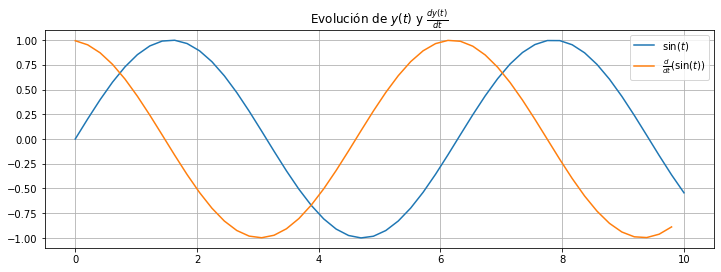

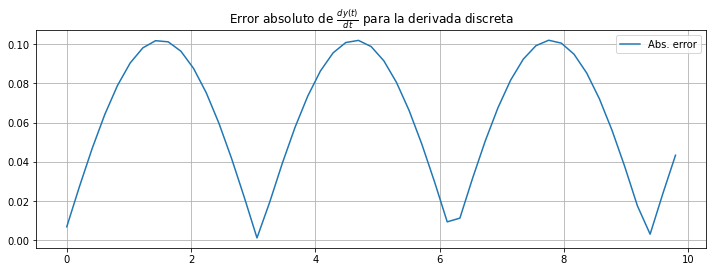

In [2]:
t = np.linspace(0,10);
y = np.sin(t);

def derivada_discreta(y,t, equally_spaced=True):
    if len(y) != len(t): print("Los vectores no tienen las mismas dimensiones")
    else:
        dydt = np.empty(len(y))
        if equally_spaced == True:
            dt = t[1] - t[0]
            for i in range(len(y)-1):
                dydt[i] = (y[i+1] - y[i])/dt
        else:
            for i in range(len(y)-1):
                dt = t[i+1] - t[i]
                dydt[i] = (y[i+1] - y[i])/dt
        dydt = dydt[0:-1]
        return dydt

dydt = derivada_discreta(y,t)

plt.figure(figsize=(12,4))
plt.plot(t,y, label=r"$\sin(t)$")
plt.plot(t[0:-1],dydt, label=r"$\frac{d}{dt}\left(\sin(t)\right)$")
plt.title(r"Evolución de $y(t)$ y $\frac{dy(t)}{dt}$")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(t[0:-1],abs(np.cos(t[0:-1]) - dydt), label="Abs. error")
plt.title(r"Error absoluto de $\frac{dy(t)}{dt}$ para la derivada discreta")
plt.legend(); plt.grid(); plt.show()

### Método de Euler

Este método surge para aproximar las soluciones a ecuaciones diferenciales de primer orden cuando se conoce como evolucionan.

$$\frac{dy(t)}{dt} = f(y,t),\qquad \Rightarrow y(t) = \int f(y,t) dt$$

Similar al método anterior este metodo radica en la interpolación de la función $dy(t)/dt$ para evolucionar el sistema por lo que solo se necesitan las condiciones iniciales $(y_0, t_0)$ y el ajuste de la derivada en cada paso. 

En este caso consideramos una diferencia de tiempo constante $dt=cte$ por lo que ya no es necesario iterar sobre el tiempo y solo se necesita la condición inicial para poder evolucionar el sistema.


$$y_{n+1} = y_n + \frac{dy(t)}{dt}\bigg|_{t_n}(t_{n+1}-t_n)$$

Finalmente al considerar que estamos trabajando con una distribución de $t$ simétrica se obtiene lo siguiente:

$$y_{n+1} = y_n + \frac{dy(t)}{dt}\bigg|_{t_0 + n\Delta t}\Delta t,\qquad \Delta t = t_n-t_{n-1}=t_1-t_0$$

Volvemos a aplicarlo a nuestra función $y(t) = \sin(t) + c_1$, con $dy/dt=\cos(t)$.

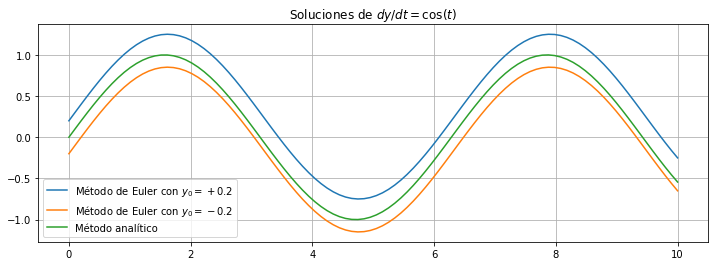

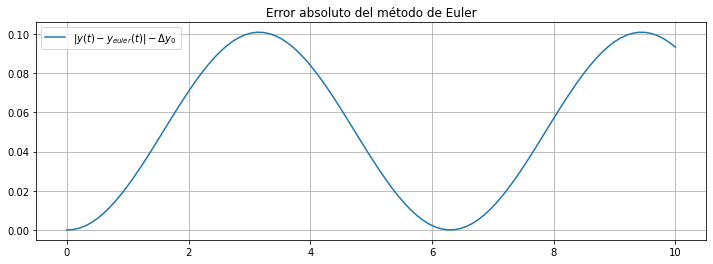

In [3]:
t = np.linspace(0,10, num=100);
dy = np.cos(t);
y0 = 0.2

def euler_solver_data(y0, dy, t, equally_spaced=True):
    if len(dy) != len(t): print("Los vectores no tienen las mismas dimensiones")
    else:
        y = np.empty(len(dy)+1)
        y[0] = y0
        if equally_spaced == True:
            dt = t[1] - t[0]; 
            for i in range(len(dy)):
                y[i+1] = y[i] + dy[i] * dt
        else:
            for i in range(len(dy)):
                dt = t[i+1] - t[i];
                y[i+1] = y[i] + dy[t[i]] * dt
        y = y[0:-1]
        return y

y = euler_solver_data(y0, dy, t)
yy = euler_solver_data(-y0, dy, t)

plt.figure(figsize=(12,4))
plt.plot(t,y, label=r"Método de Euler con $y_0=+0.2$")
plt.plot(t,yy, label=r"Método de Euler con $y_0=-0.2$")
plt.plot(t,np.sin(t), label=r"Método analítico")
plt.title(r"Soluciones de $dy/dt=\cos(t)$")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(t,abs(y - np.sin(t))-y0, label="$|y(t)-y_{euler}(t)|-\Delta y_0$")
plt.title(r"Error absoluto del método de Euler")
plt.legend(); plt.grid(); plt.show()

También podemos definir la derivada al declararla como función para resolver de manera análoga al cálculo simbólico.

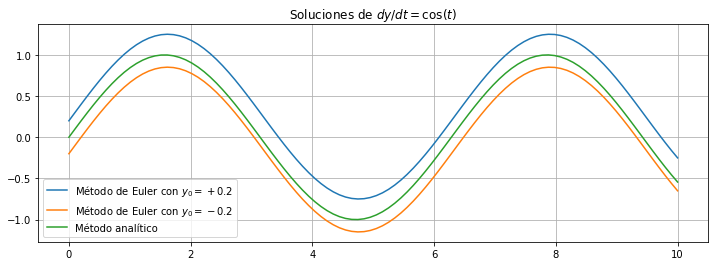

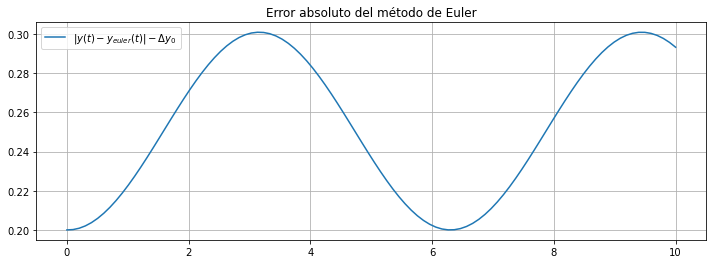

In [4]:
t = np.linspace(0,10, num=100);
dy = [lambda x: np.cos(x)];
y0 = 0.2

def euler_solver(y0, dy, t, equally_spaced=True):
    # t = t.reshape((len(t),1))
    y = np.empty([len(t)+1, len(dy)])
    y[0] = y0
    if equally_spaced == True:
        dt = t[1] - t[0]; 
        for i in range(len(t)):
            y[i+1] = y[i] + dy[0](t[i]) * dt
    else:
        for i in range(len(t)):
            dt = t[i+1] - t[i];
            y[i+1] = y[i] + dy[0](t[i]) * dt
    y = y[0:-1]
    return y

y = euler_solver(y0, dy, t)
yy = euler_solver(-y0, dy, t)

plt.figure(figsize=(12,4))
plt.plot(t,y, label=r"Método de Euler con $y_0=+0.2$")
plt.plot(t,yy, label=r"Método de Euler con $y_0=-0.2$")
plt.plot(t,np.sin(t), label=r"Método analítico")
plt.title(r"Soluciones de $dy/dt=\cos(t)$")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(t, abs(y-np.sin(t).reshape(len(t),1)), label="$|y(t)-y_{euler}(t)|-\Delta y_0$")
plt.title(r"Error absoluto del método de Euler")
plt.legend(); plt.grid(); plt.show()

## Sistemas de segundo orden

Por un lado podemos considerar el problema del oscilador armónico que consiste en un resorte que está oscilando $\epsilon$ alrededor de su punto de equilibrio $x_0$. Consideramos la segunda ley de Newton.

$$ F = ma = m\frac{d^2x}{dt^2} $$

Además como se trata de un sistema elástico tenemos que la fuerza está dada por

$$ F = -kx $$

Y al igualar las dos ecuaciones anteriores se tiene 

$$ m \frac{d^2x}{dt^2} = -kx,\qquad x(t_0)=x_0,\quad v(t_0)=x'(t_0)=0 $$

Ahora nos valemos de un truco para pasar la ecuación anterior en términos de sus primeras derivadas, introducimos $v(t)=x'(t)$ al sistema.

\begin{align}
    v(t) = \frac{dx}{dt}\\
    a(t) = \frac{dv}{dt}
\end{align}

Finalmente sustituimos y tenemos nuestro sistema de dos ecuaciones.

\begin{align}
    \frac{dx}{dt} &= v \\
    \frac{dv}{dt} &= \left(-\frac{k}{m}\right)x
\end{align}

cuya solución analítica es de la forma

$$x(t) = x_0\cos\left(\frac{k}{m}t\right)$$



### Método de Euler para sistemas de segundo orden

Para implementar el método de Euler es necesario establecer las condiciones iniciales de las variables y conocer las derivadas de las mismas para poder resolver simultaneamente en un periodo de tiempo corto. Tenemos nuestras ecuaciones dadas por:


\begin{align}
    x_{n+1} &= x_n + \Delta t\frac{dx}{dt}\bigg|_{t_n} \\
    v_{n+1} &= v_n + \Delta t\frac{dv}{dt}\bigg|_{t_n}
\end{align}

Para poder implementar esto vamos a considerar un vector de variables $\vec{X}(t)=[x(t),v(t)]$ para poder evolucionar de manera simultanea, así que implementandolo se ve lo siguiente:

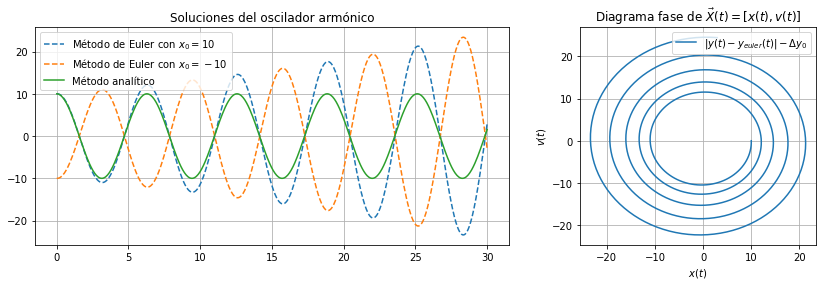

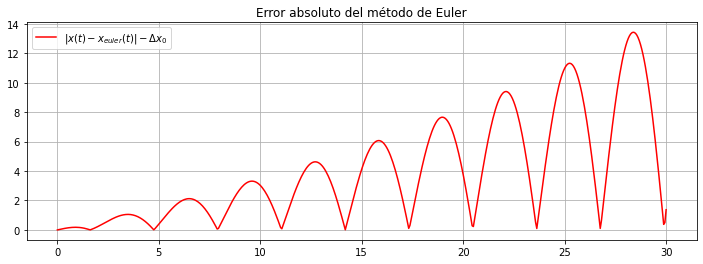

In [5]:
k = 1; #resorte
m = 1; #masa
t = np.linspace(0, 30, num=500);
dX = [lambda x,v,t: v,               # dx/dt = v
      lambda x,v,t: -(k/m)*x];       # dv/dt = -(k/m)x
X0 = np.array([10, 0])      # (x_0, v_0)

def euler_solver(X0, dX, t, equally_spaced=True):
    # t = t.reshape((len(t),1))
    dims = len(X0)
    X = np.empty([len(t)+1, dims])
    
    for d in range(dims):   
        X[0, d] = X0[d]

    if equally_spaced == True:
        dt = t[1] - t[0]; 
        for i in range(len(t)):
            for d in range(dims):
                X[i+1,d] = X[i,d] + dX[d](X[i,0], X[i,1], t[i]) * dt
    else:
        for i in range(len(t)):
            dt = t[i+1] - t[i];
            for d in range(dims):
                X[i+1,d] = X[i,d] + dX[d](X[i,0], X[i,1], t[i]) * dt
    X = X[0:-1,:]
    return X

X = euler_solver(X0, dX, t)
XX = euler_solver(-X0, dX, t)

fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[2,1]), figsize=(14,4))
ax[0].plot(t,X[:,0], "--", label=f"Método de Euler con $x_0={+X0[0]}$")
ax[0].plot(t,XX[:,0], "--", label=f"Método de Euler con $x_0={-X0[0]}$")
ax[0].plot(t, X0[0]*np.cos(k/m*t), label=r"Método analítico")
ax[0].set_title(r"Soluciones del oscilador armónico")
ax[0].legend(); ax[0].grid();

ax[1].plot(X[:,0], X[:,1], label="$|y(t)-y_{euler}(t)|-\Delta y_0$")
ax[1].set_title(r"Diagrama fase de $\vec{X}(t)=[x(t),v(t)]$")
ax[1].set_xlabel("$x(t)$"); ax[1].set_ylabel("$v(t)$");
ax[1].legend(); ax[1].grid(); 
plt.show()

plt.figure(figsize=(12,4))
plt.plot(t, abs(X[:,0]-X0[0]*np.cos(k/m*t)), color="r", label="$|x(t)-x_{euler}(t)|-\Delta x_0$")
plt.title(r"Error absoluto del método de Euler")
plt.legend(); plt.grid(); plt.show()

### Método de Runge-Kutta

Como ya vimos, hay varias formas diferentes de resolver ecuaciones diferenciales ordinarias de manera numérica. Uno de los más populares es el método de Runge-Kutta ya que con 4 pasos permite estimar la derivada y corregirla para luego hacer un promedio ponderado alrededor del punto inicial y punto final. Para poder implementarlo consideramos un sistema de la forma:

$$\frac{dy}{dt}=f(t,y)$$

Y el método de Runge-Kutta está definido por el sistema de ecuaciones

\begin{align}
    k_1 &= f(y_n,t_n) \\ 
    k_2 &= f\left(t_n + \frac{\Delta t}{2}, y_n + \frac{k_1 \Delta t }{2}\right) \\
    k_3 &= f\left(t_n + \frac{\Delta t}{2}, y_n + \frac{k_2\Delta t }{2}\right) \\
    k_4 &= f\left(t_n + \Delta t, y_n + k_3\Delta t \right) \\
    y_{n+1} &= y_n + \frac{\Delta t}{6}\left(k_1+2k_2+2k_3+k_4\right)
\end{align}

Ahora, aplicamos este método al problema del oscilador armónico.

In [6]:
def dX(X, t):
    x, v = X
    dx = v;
    dv = -(k/m)*x
    return np.array([dx,dv])

In [7]:
Aaaaa = np.empty([4, 2])
Aaaaa[0] = dX(np.array([1,1]),0)
Aaaaa, dX(np.array([1,1]),0), Aaaaa.T[0]


(array([[  1.        ,  -1.        ],
        [  0.        ,   0.        ],
        [103.50361328,   0.        ],
        [103.50361328, -14.        ]]),
 array([ 1., -1.]),
 array([  1.        ,   0.        , 103.50361328, 103.50361328]))

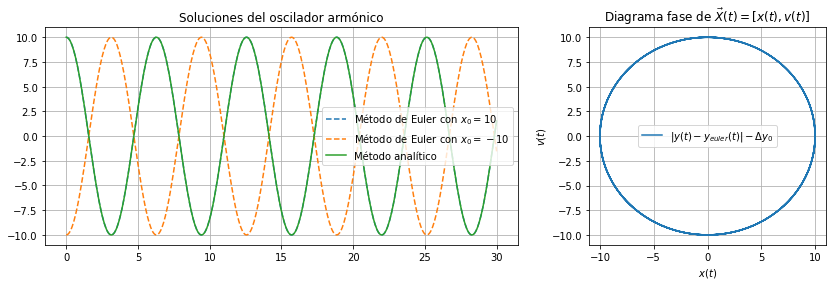

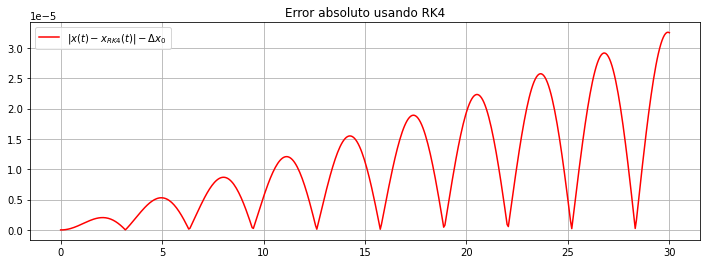

In [8]:
k = 1; #resorte
m = 1; #masa
t = np.linspace(0, 30, num=500);

def dX(X, t):
    x, v = X
    dx = v;
    dv = -(k/m)*x
    return np.array([dx,dv])
X0 = np.array([10, 0])      # (x_0, v_0)

def RK_solver(X0, dX, t, equally_spaced=True):
    dims = len(X0)
    K = np.empty([4, dims])
    X = np.empty([len(t)+1, dims])
    
    for d in range(dims):   
        X[0, d] = X0[d]

    if equally_spaced == True:
        dt = t[1] - t[0]; 
        for i in range(len(t)):
            K[0] = dt * dX(X[i], t[i]) 
            K[1] = dt * dX(X[i] + K[0]/2, t[i] + dt/2)
            K[2] = dt * dX(X[i] + K[1]/2, t[i] + dt/2)
            K[3] = dt * dX(X[i] + K[2]  , t[i] + dt)
            for d in range(dims):
                X[i+1, d] = X[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    else:
        for i in range(len(t)):
            dt = t[i+1] - t[i];
            K[0] = dt * dX(X[i], t[i]) 
            K[1] = dt * dX(X[i] + K[0]/2, t[i] + dt/2)
            K[2] = dt * dX(X[i] + K[1]/2, t[i] + dt/2)
            K[3] = dt * dX(X[i] + K[2]  , t[i] + dt)
            for d in range(dims):
                X[i+1, d] = X[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    X = X[0:-1,:]
    return X

X1 = RK_solver(X0, dX, t)
X2 = RK_solver(-X0, dX, t)

fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[2,1]), figsize=(14,4))
ax[0].plot(t,X1[:,0], "--", label=f"Método de Euler con $x_0={+X0[0]}$")
ax[0].plot(t,X2[:,0], "--", label=f"Método de Euler con $x_0={-X0[0]}$")
ax[0].plot(t, X0[0]*np.cos(k/m*t), label=r"Método analítico")
ax[0].set_title(r"Soluciones del oscilador armónico")
ax[0].legend(); ax[0].grid();

ax[1].plot(X1[:,0], X1[:,1], label="$|y(t)-y_{euler}(t)|-\Delta y_0$")
ax[1].set_title(r"Diagrama fase de $\vec{X}(t)=[x(t),v(t)]$")
ax[1].set_xlabel("$x(t)$"); ax[1].set_ylabel("$v(t)$");
ax[1].legend(); ax[1].grid(); 
plt.show()

plt.figure(figsize=(12,4))
plt.plot(t, abs(X1[:,0]-X0[0]*np.cos(k/m*t)), color="r", label="$|x(t)-x_{RK4}(t)|-\Delta x_0$")

plt.title(r"Error absoluto usando RK4")
plt.legend(); plt.grid(); plt.show()

## Sistemas dinámicos
A partir de estos métodos, cada vez más refinados, podemos ir considerando sistemas de ecuaciones cada vez más conplejos.

Para ello podemos considerar al modelo básico de depredador presa formulado por **Lotka-Volterra** que consiste en un sistema biológico que se rige por las siguientes ecuaciones

\begin{align}
    \frac{dP}{dt} = \alpha_1 P - \mu_1 PD\\
    \frac{dD}{dt} = \alpha_2 PD - \mu_2 D 
\end{align}

donde $P$ es el número de presas, $D$ es el número de depredadore, $\alpha_1$ representa el crecimiento de las presas, $\mu_1$ es la tasa de depredación de las presas por los depredadores, $\alpha_2$ es la tasa de crecimiento de los depredadores debido a la efectividad de la caza y $\mu_2$ es la muerte natural de los depredarores.

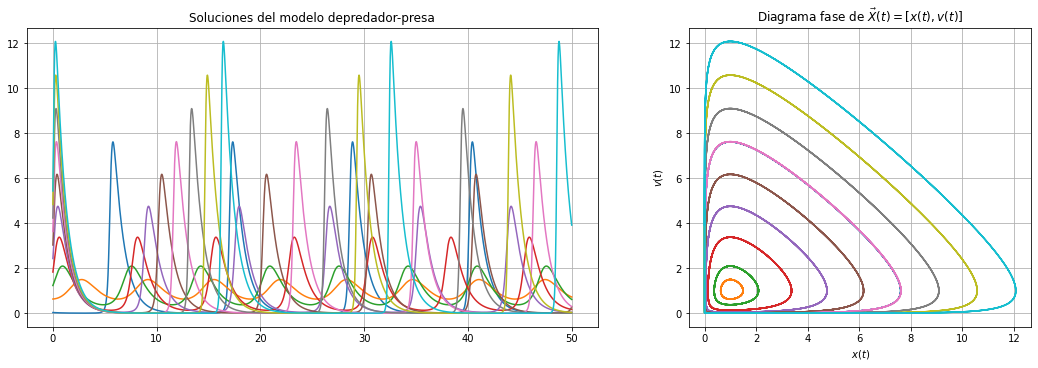

In [68]:
start=0
step=0.005
num=10000
t = np.arange(0,num)*step+start

def dX(X, t):
    P, D = X
    dP = P - P*D;
    dD = P*D - D;
    return np.array([dP, dD])
X0 = np.array([5,3])      # (x_0, v_0)

S = []
for i in range(10):
    S.append(RK_solver(((2*i+0.1)/10)*X0, dX, t))

fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[5,3]), figsize=(18,5.5))
for i in range(len(S)):
    ax[0].plot(t,S[i][:,1])
ax[0].set_title(r"Soluciones del modelo depredador-presa")
# ax[0].legend(); 
ax[0].grid();

for i in range(len(S)):
    ax[1].plot(S[i][:,0], S[i][:,1])
ax[1].set_title(r"Diagrama fase de $\vec{X}(t)=[x(t),v(t)]$")
ax[1].set_xlabel("$x(t)$"); ax[1].set_ylabel("$v(t)$");
# ax[1].legend(); 
ax[1].grid(); 
plt.show()

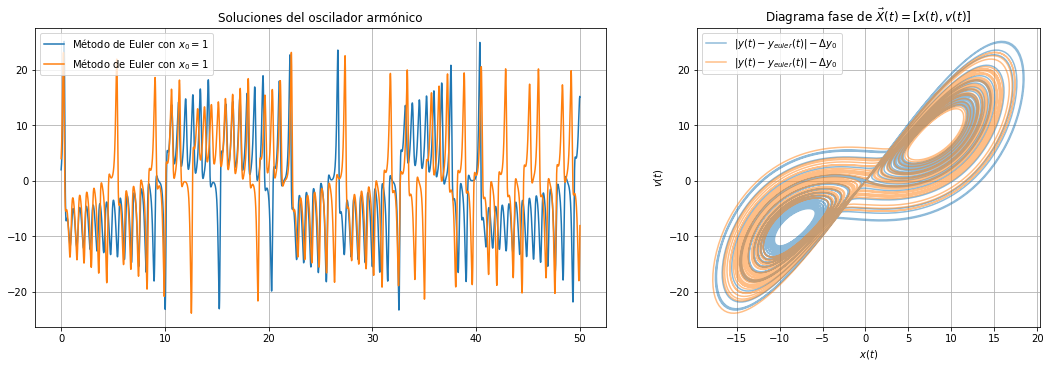

In [56]:
start=0
step=0.005
num=10000
t = np.arange(0,num)*step+start

def dX(X, t):
    x, y, z = X
    dx = 10*(y-x);
    dy = x*(27-z) - y
    dz = x*y - 8/3*z
    return np.array([dx, dy, dz])
X0 = np.array([1,2,3])      # (x_0, v_0)

S1 = RK_solver(X0, dX, t)
S2 = RK_solver(2*X0, dX, t)

fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[5,3]), figsize=(18,5.5))
ax[0].plot(t,S1[:,1], label=f"Método de Euler con $x_0={+X0[0]}$")
ax[0].plot(t,S2[:,1], label=f"Método de Euler con $x_0={+X0[0]}$")
ax[0].set_title(r"Soluciones del oscilador armónico")
ax[0].legend(); ax[0].grid();

ax[1].plot(S1[:,0], S1[:,1], label="$|y(t)-y_{euler}(t)|-\Delta y_0$", alpha=0.5)
ax[1].plot(S2[:,0], S2[:,1], label="$|y(t)-y_{euler}(t)|-\Delta y_0$", alpha=0.5)
ax[1].set_title(r"Diagrama fase de $\vec{X}(t)=[x(t),v(t)]$")
ax[1].set_xlabel("$x(t)$"); ax[1].set_ylabel("$v(t)$");
ax[1].legend(); ax[1].grid(); 
plt.show()

IndexError: ignored

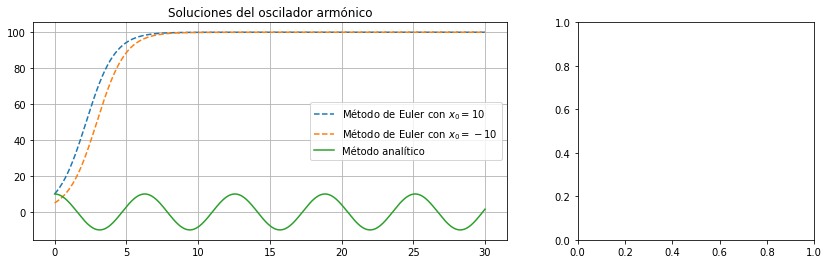

In [14]:
k = 1; #resorte
m = 1; #masa
t = np.linspace(0, 30, num=500);

def dX(X, t):
    x= X
    dx = x*(1-x/100); 
    return np.array([dx])
X0 = np.array([10])      # (x_0, v_0)

def RK_solver(X0, dX, t, equally_spaced=True):
    dims = len(X0)
    K = np.empty([4, dims])
    X = np.empty([len(t)+1, dims])
    
    for d in range(dims):   
        X[0, d] = X0[d]

    if equally_spaced == True:
        dt = t[1] - t[0]; 
        for i in range(len(t)):
            K[0] = dt * dX(X[i], t[i]) 
            K[1] = dt * dX(X[i] + K[0]/2, t[i] + dt/2)
            K[2] = dt * dX(X[i] + K[1]/2, t[i] + dt/2)
            K[3] = dt * dX(X[i] + K[2]  , t[i] + dt)
            for d in range(dims):
                X[i+1, d] = X[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    else:
        for i in range(len(t)):
            dt = t[i+1] - t[i];
            K[0] = dt * dX(X[i], t[i]) 
            K[1] = dt * dX(X[i] + K[0]/2, t[i] + dt/2)
            K[2] = dt * dX(X[i] + K[1]/2, t[i] + dt/2)
            K[3] = dt * dX(X[i] + K[2]  , t[i] + dt)
            for d in range(dims):
                X[i+1, d] = X[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    X = X[0:-1,:]
    return X

S1 = RK_solver(X0, dX, t)
S2 = RK_solver(1/2*X0, dX, t)

fig, ax = plt.subplots(1,2, gridspec_kw=dict(width_ratios=[2,1]), figsize=(14,4))
ax[0].plot(t,S1[:,0], "--", label=f"Método de Euler con $x_0={+X0[0]}$")
ax[0].plot(t,S2[:,0], "--", label=f"Método de Euler con $x_0={-X0[0]}$")
ax[0].plot(t, X0[0]*np.cos(k/m*t), label=r"Método analítico")
ax[0].set_title(r"Soluciones del oscilador armónico")
ax[0].legend(); ax[0].grid();

ax[1].plot(S1[:,0], S1[:,1], label="$|y(t)-y_{euler}(t)|-\Delta y_0$")
ax[1].set_title(r"Diagrama fase de $\vec{X}(t)=[x(t),v(t)]$")
ax[1].set_xlabel("$x(t)$"); ax[1].set_ylabel("$v(t)$");
ax[1].legend(); ax[1].grid(); 
plt.show()